# Clasificador de basura

## Importa librerias

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

import cv2 as cv
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import progressbar, time

In [0]:
def grafica(train,test,clas):
    barWidth=0.2
    plt.figure(figsize=(20,10))
    plt.grid()
    plt.bar(np.arange(len(train)), train, color="gold", width=barWidth, label="train");
    plt.bar([x + barWidth for x in np.arange(len(train))], test, color="crimson", width=barWidth, label="test");
    plt.xlabel("Clasificadores");
    plt.ylabel("Accuracy");
    plt.xticks([r + barWidth for r in range(len(train))], clas);
    plt.title("Accuracy de los clasificadores");
    plt.legend();
    plt.show();

# Image_Set64

## Carga las imagenes



In [0]:
path_imagenes = '/content/drive/My Drive/Clasificador de basura/image_set64/'
nombre_imagenes = os.listdir(path_imagenes)

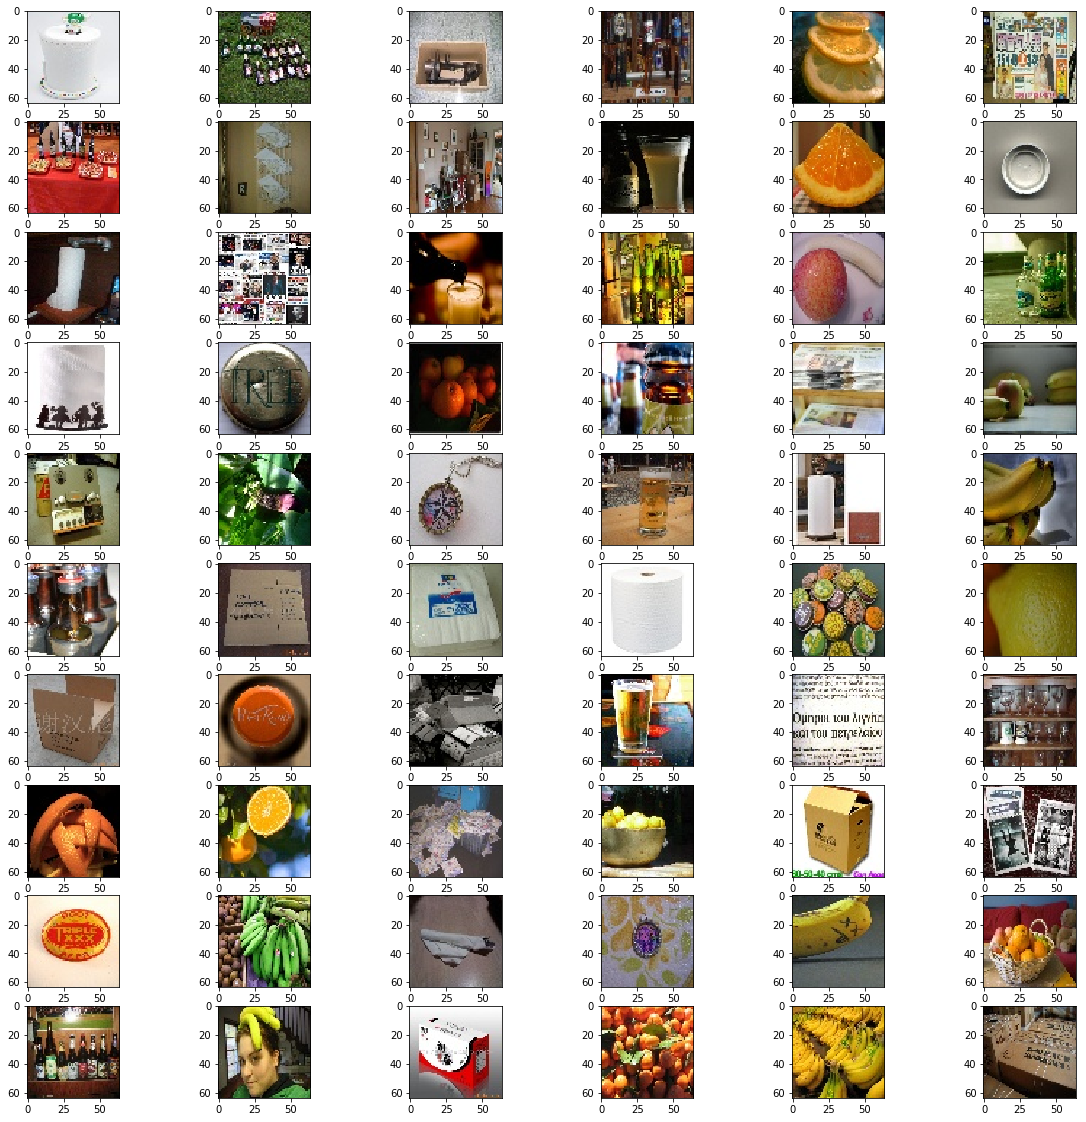

In [5]:
plt.figure(figsize=(20,20))
for i in range(1,61):
    path_image = path_imagenes+nombre_imagenes[i]
    img = cv.cvtColor(cv.imread(path_image), cv.COLOR_RGB2BGR)
    plt.subplot(10,6,i)
    plt.imshow(img)

## Genera las X y Y

In [6]:
total = progressbar.ProgressBar(maxval=len(nombre_imagenes))
total.start()
X=[]
Y=[]
for i,img_nombre in enumerate(nombre_imagenes):
    path_image = path_imagenes+img_nombre
    img = cv.cvtColor(cv.imread(path_image), cv.COLOR_RGB2BGR)
    height, width, depth = img.shape
    X.append(img.reshape(height*width*depth))
    Y.append(nombre_imagenes[i][0])
    total.update(i)
total.finish()

100% (9000 of 9000) |####################| Elapsed Time: 0:00:56 Time:  0:00:56


In [0]:
X=np.array(X,dtype=int)
Y=np.array(Y,dtype=int)

In [0]:
n = int(len(X)*0.8)
tam=range(len(Y))
perm = np.random.permutation(len(tam))
X_train = X[perm[:n]]
Y_train = Y[perm[:n]]
X_test = X[perm[n:]]
Y_test = Y[perm[n:]]

# GaussianBlur Combinado

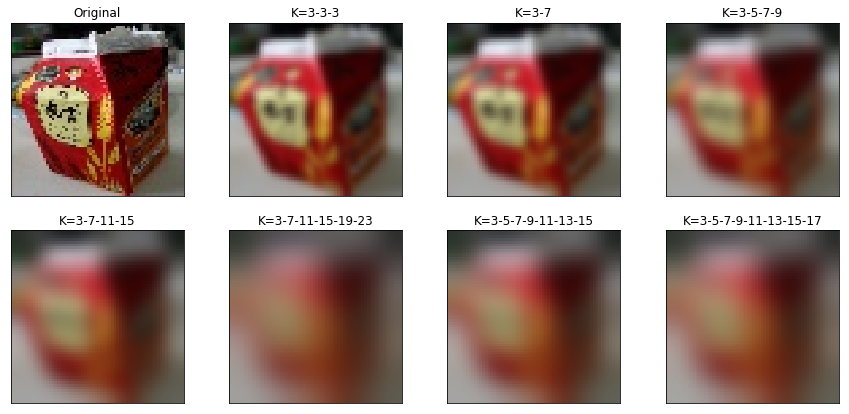

In [9]:
path_image = path_imagenes+"11937.jpg"

img = cv.cvtColor(cv.imread(path_image), cv.COLOR_RGB2BGR)
img_G3 = cv.GaussianBlur(img,(3,3),0)
img_G5 = cv.GaussianBlur(img,(5,5),0)
img_G7 = cv.GaussianBlur(img,(7,7),0)

img_G33 = cv.GaussianBlur(img_G3,(3,3),0)
img_G333 = cv.GaussianBlur(img_G33,(3,3),0)
img_G3333 = cv.GaussianBlur(img_G333,(3,3),0)
img_G33333 = cv.GaussianBlur(img_G3333,(3,3),0)

img_G55 = cv.GaussianBlur(img_G5,(5,5),0)
img_G555 = cv.GaussianBlur(img_G55,(5,5),0)
img_G5555 = cv.GaussianBlur(img_G555,(5,5),0)
img_G55555 = cv.GaussianBlur(img_G5555,(5,5),0)

img_G77 = cv.GaussianBlur(img_G7,(7,7),0)
img_G777 = cv.GaussianBlur(img_G77,(7,7),0)
img_G7777 = cv.GaussianBlur(img_G777,(7,7),0)
img_G77777 = cv.GaussianBlur(img_G7777,(7,7),0)

img_G35 = cv.GaussianBlur(img_G3,(5,5),0)
img_G37 = cv.GaussianBlur(img_G3,(7,7),0)
img_G57 = cv.GaussianBlur(img_G5,(7,7),0)
img_G357 = cv.GaussianBlur(img_G35,(7,7),0)

img_G359 = cv.GaussianBlur(img_G35,(9,9),0)
img_G379 = cv.GaussianBlur(img_G37,(9,9),0)
img_G579 = cv.GaussianBlur(img_G57,(9,9),0)
img_G3579 = cv.GaussianBlur(img_G357,(9,9),0)

img_G3711 = cv.GaussianBlur(img_G37,(11,11),0)
img_G371115 = cv.GaussianBlur(img_G3711,(15,15),0)
img_G37111519 = cv.GaussianBlur(img_G371115,(19,19),0)
img_G3711151923 = cv.GaussianBlur(img_G37111519,(23,23),0)


img_G357911 = cv.GaussianBlur(img_G3579,(11,11),0)
img_G35791113 = cv.GaussianBlur(img_G357911,(13,13),0)
img_G3579111315 = cv.GaussianBlur(img_G35791113,(15,15),0)
img_G357911131517= cv.GaussianBlur(img_G3579111315,(17,17),0)

plt.figure(figsize=(15,7))
plt.subplot(241), plt.imshow(img,'gray'),plt.title('Original'),plt.xticks([]),plt.yticks([]);
plt.subplot(242), plt.imshow(img_G333,'gray'), plt.title('K=3-3-3'),plt.xticks([]), plt.yticks([]); 
plt.subplot(243), plt.imshow(img_G37,'gray'), plt.title('K=3-7'),plt.xticks([]), plt.yticks([]);
plt.subplot(244), plt.imshow(img_G3579,'gray'), plt.title('K=3-5-7-9'),plt.xticks([]), plt.yticks([]);
plt.subplot(245), plt.imshow(img_G371115,'gray'),plt.title('K=3-7-11-15'),plt.xticks([]),plt.yticks([]);
plt.subplot(246), plt.imshow(img_G3711151923,'gray'), plt.title('K=3-7-11-15-19-23'),plt.xticks([]), plt.yticks([]); 
plt.subplot(247), plt.imshow(img_G3579111315,'gray'), plt.title('K=3-5-7-9-11-13-15'),plt.xticks([]), plt.yticks([]);
plt.subplot(248), plt.imshow(img_G357911131517,'gray'), plt.title('K=3-5-7-9-11-13-15-17'),plt.xticks([]), plt.yticks([]);


In [10]:
total = progressbar.ProgressBar(maxval=len(nombre_imagenes))
total.start()
X1, X2, X3, X4, X5, X6, X7=[],[],[],[],[],[],[]
Y=[]
for i,img_nombre in enumerate(nombre_imagenes):
    path_image = path_imagenes+img_nombre
    img = cv.cvtColor(cv.imread(path_image), cv.COLOR_RGB2BGR)
    img_G3 = cv.GaussianBlur(img,(3,3),0)
    img_G5 = cv.GaussianBlur(img,(5,5),0)
    img_G7 = cv.GaussianBlur(img,(7,7),0)

    img_G33 = cv.GaussianBlur(img_G3,(3,3),0)
    img_G333 = cv.GaussianBlur(img_G33,(3,3),0)
    img_G3333 = cv.GaussianBlur(img_G333,(3,3),0)
    img_G33333 = cv.GaussianBlur(img_G3333,(3,3),0)

    img_G55 = cv.GaussianBlur(img_G5,(5,5),0)
    img_G555 = cv.GaussianBlur(img_G55,(5,5),0)
    img_G5555 = cv.GaussianBlur(img_G555,(5,5),0)
    img_G55555 = cv.GaussianBlur(img_G5555,(5,5),0)

    img_G77 = cv.GaussianBlur(img_G7,(7,7),0)
    img_G777 = cv.GaussianBlur(img_G77,(7,7),0)
    img_G7777 = cv.GaussianBlur(img_G777,(7,7),0)
    img_G77777 = cv.GaussianBlur(img_G7777,(7,7),0)

    img_G35 = cv.GaussianBlur(img_G3,(5,5),0)
    img_G37 = cv.GaussianBlur(img_G3,(7,7),0)
    img_G57 = cv.GaussianBlur(img_G5,(7,7),0)
    img_G357 = cv.GaussianBlur(img_G35,(7,7),0)

    img_G359 = cv.GaussianBlur(img_G35,(9,9),0)
    img_G379 = cv.GaussianBlur(img_G37,(9,9),0)
    img_G579 = cv.GaussianBlur(img_G57,(9,9),0)
    img_G3579 = cv.GaussianBlur(img_G357,(9,9),0)

    img_G3711 = cv.GaussianBlur(img_G37,(11,11),0)
    img_G371115 = cv.GaussianBlur(img_G3711,(15,15),0)
    img_G37111519 = cv.GaussianBlur(img_G371115,(19,19),0)
    img_G3711151923 = cv.GaussianBlur(img_G37111519,(23,23),0)


    img_G357911 = cv.GaussianBlur(img_G3579,(11,11),0)
    img_G35791113 = cv.GaussianBlur(img_G357911,(13,13),0)
    img_G3579111315 = cv.GaussianBlur(img_G35791113,(15,15),0)
    img_G357911131517= cv.GaussianBlur(img_G3579111315,(17,17),0)

    height, width, depth = img.shape
    X1.append(img_G333.reshape(height*width*depth))
    X2.append(img_G37.reshape(height*width*depth))
    X3.append(img_G3579.reshape(height*width*depth))
    X4.append(img_G371115.reshape(height*width*depth))
    X5.append(img_G3711151923.reshape(height*width*depth))
    X6.append(img_G3579111315.reshape(height*width*depth))
    X7.append(img_G357911131517.reshape(height*width*depth))
    Y.append(nombre_imagenes[i][0])
    total.update(i)
total.finish()
X1=np.array(X1)
X2=np.array(X2)
X3=np.array(X3)
X4=np.array(X4)
X5=np.array(X5)
X6=np.array(X6)
X7=np.array(X7)
Y=np.array(Y,dtype=int)

100% (9000 of 9000) |####################| Elapsed Time: 0:01:15 Time:  0:01:15


# Clasificador

## RandomForestClassifier

100% (50 of 50) |########################| Elapsed Time: 0:14:32 Time:  0:14:32


El numero K con el mejor accuracy es: 46


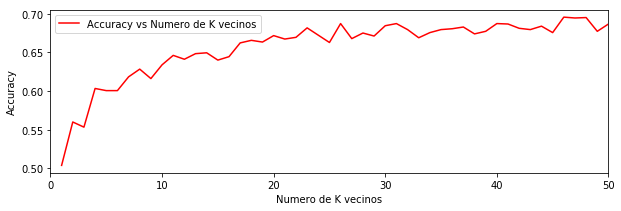

In [12]:
from sklearn.ensemble import RandomForestClassifier
x=[]
y=[]
maxi=0;
total = progressbar.ProgressBar(maxval=50)
total.start()
for i in range(1,51):
    neigh = RandomForestClassifier(n_estimators=i)
    neigh.fit(X_train, Y_train)
    x.append(i)
    score=neigh.score(X_test,Y_test)
    y.append(score) 
    if score>maxi:
        maxi=score
        ma=i
    total.update(i)
total.finish()
print ("El numero K con el mejor accuracy es:",ma)
nf=ma
plt.figure(figsize=(10,3))
plt.plot(x,y, color="red",label="Accuracy vs Numero de K vecinos")
plt.xlabel("Numero de K vecinos")
plt.ylabel("Accuracy")
plt.xlim(0,50)
plt.legend()

dimensiones train (7200, 12288) (7200,)
dimsensions test  (1800, 12288) (1800,)

RF-46
acierto en train 0.9998611111111111
acierto en test  0.6888888888888889

RF-46 GaussianBlur1
acierto en train 0.9997222222222222
acierto en test  0.7033333333333334

RF-46 GaussianBlur2
acierto en train 1.0
acierto en test  0.7005555555555556

RF-46 GaussianBlur3
acierto en train 0.9997222222222222
acierto en test  0.71
RF-46 GaussianBlur4
acierto en train 1.0
acierto en test  0.6972222222222222
RF-46 GaussianBlur5
acierto en train 0.9997222222222222
acierto en test  0.6977777777777778
RF-46 GaussianBlur6
acierto en train 0.9998611111111111
acierto en test  0.6972222222222222
RF-46 GaussianBlur7
acierto en train 0.9998611111111111
acierto en test  0.7005555555555556


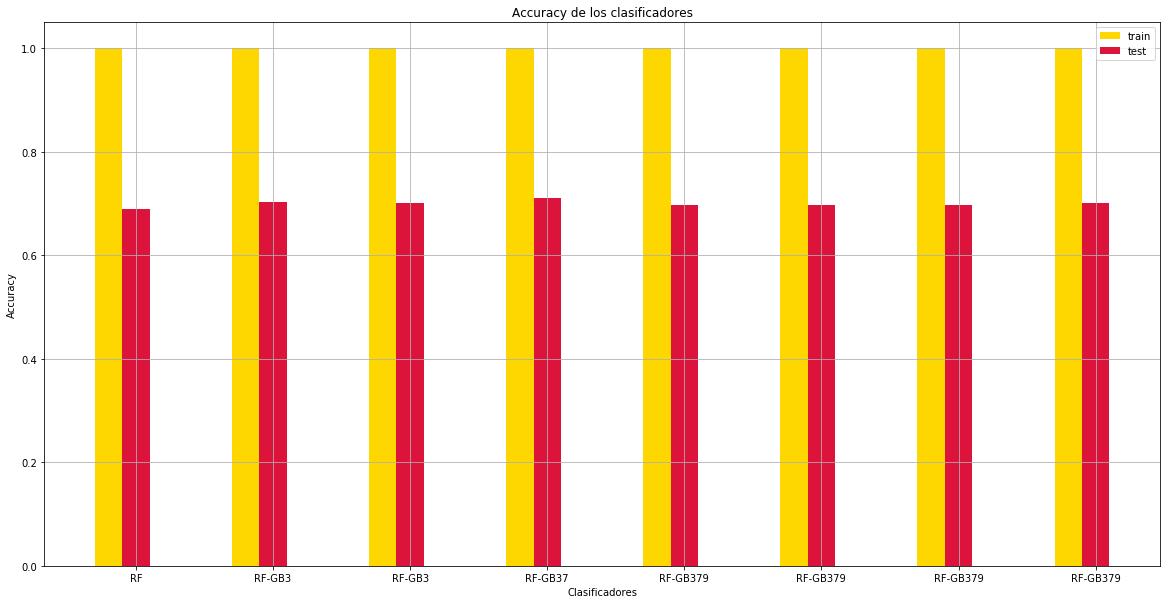

In [13]:
train=[]
test=[]
clas=["RF"]

Y_train = Y[perm[:n]]
Y_test = Y[perm[n:]]

print ("dimensiones train", X_train.shape, Y_train.shape)
print ("dimsensions test ", X_test.shape, Y_test.shape)
print ("")

est = RandomForestClassifier(n_estimators=nf)
X_train = X[perm[:n]] 
X_test = X[perm[n:]]
print ("RF-"+str(nf))
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-GB3")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")

est = RandomForestClassifier(n_estimators=nf)
X_train = X1[perm[:n]] 
X_test = X1[perm[n:]]
print ("RF-"+str(nf)+" GaussianBlur1")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-GB3")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")

est = RandomForestClassifier(n_estimators=nf)
X_train = X2[perm[:n]] 
X_test = X2[perm[n:]]
print ("RF-"+str(nf)+" GaussianBlur2")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-GB37")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")

est = RandomForestClassifier(n_estimators=nf)
X_train = X3[perm[:n]] 
X_test = X3[perm[n:]]
print ("RF-"+str(nf)+" GaussianBlur3")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-GB379")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))

est = RandomForestClassifier(n_estimators=nf)
X_train = X4[perm[:n]] 
X_test = X4[perm[n:]]
print ("RF-"+str(nf)+" GaussianBlur4")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-GB379")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))

est = RandomForestClassifier(n_estimators=nf)
X_train = X5[perm[:n]] 
X_test = X5[perm[n:]]
print ("RF-"+str(nf)+" GaussianBlur5")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-GB379")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))

est = RandomForestClassifier(n_estimators=nf)
X_train = X6[perm[:n]] 
X_test = X6[perm[n:]]
print ("RF-"+str(nf)+" GaussianBlur6")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-GB379")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))

est = RandomForestClassifier(n_estimators=nf)
X_train = X7[perm[:n]] 
X_test = X7[perm[n:]]
print ("RF-"+str(nf)+" GaussianBlur7")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-GB379")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))

grafica(train,test,clas)

# Bolsa de palabras

In [0]:
from skimage import io
from sklearn.cluster import KMeans
from skimage.color import rgb2gray
import cv2 as cv
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)

In [15]:
path_imagenes = '/content/drive/My Drive/Clasificador de basura/image_set64/'
nombre_imagenes = os.listdir(path_imagenes)
nombres=np.array(nombre_imagenes)
array_imgs_train=nombres[perm[:n]]
array_imgs_test=nombres[perm[n:]]

print (array_imgs_train.shape, array_imgs_test.shape)
print (array_imgs_train.shape[0]+ array_imgs_test.shape[0])
print (array_imgs_test[0])

(7200,) (1800,)
9000
10507.jpg


In [16]:
import gc
total = progressbar.ProgressBar(maxval=len(array_imgs_train))
total.start()
array_ORB=[]
img =io.imread(path_imagenes+array_imgs_train[0])
descriptor_extractor = ORB(n_keypoints=200)
descriptor_extractor.detect_and_extract(rgb2gray(img))
array_ORB=descriptor_extractor.descriptors*1
total.update(0)

for i in range(1,len(array_imgs_train)):
    try:
        img =io.imread(path_imagenes+array_imgs_train[i])
        descriptor_extractor = ORB(n_keypoints=200)
        descriptor_extractor.detect_and_extract(rgb2gray(img))
        array_ORB=np.concatenate((array_ORB,descriptor_extractor.descriptors*1))
        total.update(i)
    except RuntimeError:
        total.update(i)
total.finish()

array_ORB=np.array(array_ORB)

gc.collect() # explicitelly clean memory

print (array_ORB.shape)

100% (7200 of 7200) |####################| Elapsed Time: 0:13:47 Time:  0:13:47


(259348, 256)


In [0]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(array_ORB)

In [0]:
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

In [19]:
import gc

arr_h_train=[]
arr_h_test=[]
ya_train=[]
ya_test=[]

total = progressbar.ProgressBar(maxval=len(array_imgs_train))
total.start()
for i in range(len(array_imgs_train)):
    try:
        img =io.imread(path_imagenes+array_imgs_train[i])
        descriptor_extractor = ORB(n_keypoints=200)
        descriptor_extractor.detect_and_extract(rgb2gray(img))
        arr_h_train.append(build_histogram(descriptor_extractor.descriptors*1,kmeans))
        ya_train.append(array_imgs_train[i][0])
        total.update(i)
    except ValueError:
        total.update(i)
    except RuntimeError:
        total.update(i)
total.finish()

total = progressbar.ProgressBar(maxval=len(array_imgs_test))
total.start()
for i in range(len(array_imgs_test)):
    try:
        img =io.imread(path_imagenes+array_imgs_test[i])
        descriptor_extractor = ORB(n_keypoints=200)
        descriptor_extractor.detect_and_extract(rgb2gray(img))
        arr_h_test.append(build_histogram(descriptor_extractor.descriptors*1,kmeans))
        ya_test.append(array_imgs_test[i][0])
        total.update(i)
    except ValueError:
        total.update(i)
    except RuntimeError:
        total.update(i)
total.finish()

arr_h_train=np.array(arr_h_train)
arr_h_test=np.array(arr_h_test)
ya_train=np.array(ya_train)
ya_test=np.array(ya_test)

print (arr_h_train.shape, arr_h_test.shape, ya_train.shape, ya_test.shape)

100% (7200 of 7200) |####################| Elapsed Time: 0:03:03 Time:  0:03:03
100% (1800 of 1800) |####################| Elapsed Time: 0:00:44 Time:  0:00:44


(7106, 10) (1776, 10) (7106,) (1776,)


dimensiones train (7200, 12288) (7200,)
dimsensions test  (1800, 12288) (1800,)

RF-46
acierto en train 0.9998611111111111
acierto en test  0.6844444444444444

RF-46 BoW
acierto en train 0.992822966507177
acierto en test  0.38344594594594594


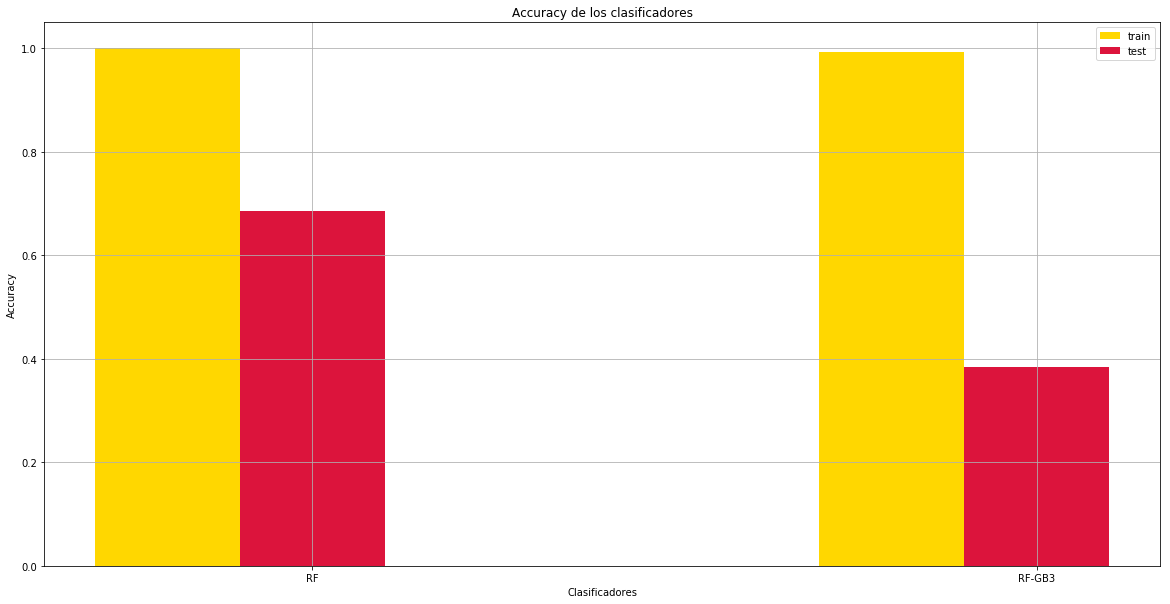

In [20]:
from sklearn.ensemble import RandomForestClassifier
train=[]
test=[]
clas=["RF"]

print ("dimensiones train", X_train.shape, Y_train.shape)
print ("dimsensions test ", X_test.shape, Y_test.shape)
print ("")

Y_train = Y[perm[:n]]
Y_test = Y[perm[n:]]

est = RandomForestClassifier(n_estimators=nf)
X_train = X[perm[:n]] 
X_test = X[perm[n:]]
print ("RF-"+str(nf))
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-GB3")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))
print ("")

X_train=arr_h_train
Y_train=ya_train
X_test=arr_h_test
Y_test=ya_test
est = RandomForestClassifier(n_estimators=nf)
print ("RF-"+str(nf)+" BoW")
est.fit(X_train, Y_train)
train.append(est.score(X_train, Y_train))
test.append(est.score(X_test, Y_test))
clas.append("RF-BoW")
print ("acierto en train", est.score(X_train, Y_train))
print ("acierto en test ", est.score(X_test, Y_test))


grafica(train,test,clas)